
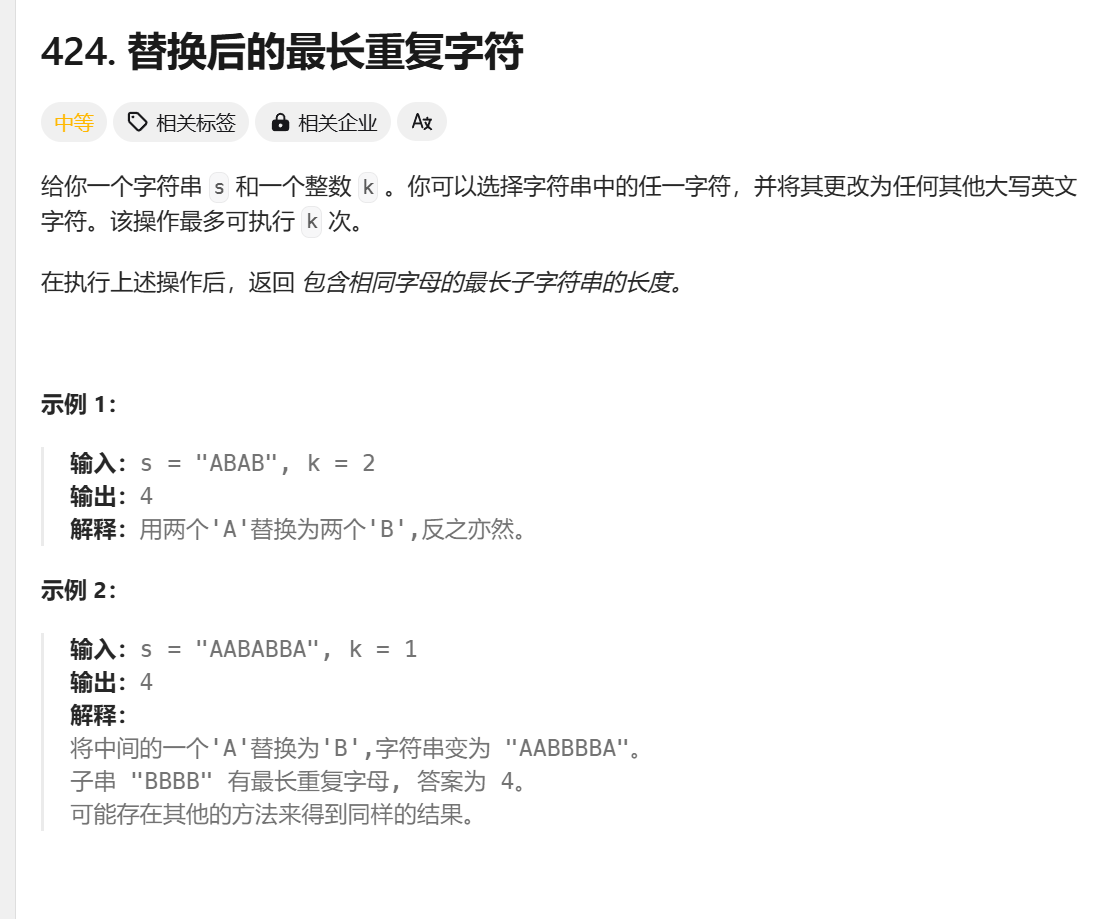

方法：双指针（滑动窗口）
- 右边界先移动找到一个满足题意的可以替换 k 个字符以后，所有字符都变成一样的当前看来最长的子串，直到右边界纳入一个字符以后，不能满足的时候停下；
- 然后考虑左边界向右移动，左边界只须要向右移动一格以后，右边界就又可以开始向右移动了，继续尝试找到更长的目标子串；
- 替换后的最长重复子串就产生在右边界、左边界交替向右移动的过程中。


In [1]:
class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        size = len(s)
        count = {}
        left, right, maxcount, res = 0, 0, 0, 0
        for right in range(size):
            count[s[right]] = count.get(s[right], 0) + 1 # get就是找到对应key的value 如果没有就自动返回value为0，相当于初始化
            maxcount = max(maxcount, count[s[right]]) # 只有最新出现的元素有机会变成最大的count
            # 阈值条件是 right - left + 1 - maxcount > k
            if right - left + 1 - maxcount > k: # 说明拿进来一个不能要的元素，只能向左移动，使得下面res更新的是上一个循环中的有效长度
                count[s[left]] -= 1
                left += 1
                # 然后将左边的向左移
            res = max(res, right - left + 1) # 记录的是上次的长度 （放外面就是实时更新，因为存在到最后也没有超出的情况）
        return res


影响有限：即使 max_count 在收缩窗口后没有更新，它的影响也很有限。我们关注的是在整个滑动窗口过程中记录的最长有效子字符串，而不是确保每次都精确更新 max_count。

设计目的：这种设计是为了在扩展窗口时有效计算最大值，同时避免在每次收缩窗口时都重新计算 max_count，这可能会降低效率。

最终结果正确性：即使 max_count 没有及时更新，max_length 仍然会准确记录整个过程中最长的有效窗口。最终返回的结果仍然是正确的。
奇怪......